In [2]:
library(immunarch)  # Load the package into R
immdata <- repLoad("/corgi/martin/R/patient3/")

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: dtplyr

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: patchwork


== Step 1/3: loading repertoire files... ==


Processing "/corgi/martin/R/patient3/" ...

  -- [1/12] Parsing "/corgi/martin/R/patient3//N4_IGG.txt" -- 
mixcr

  -- [2/12] Parsing "/corgi/martin/R/patient3//N4_IGK.txt" -- 
mixcr

  -- [3/12] Parsing "/corgi/martin/R/patient3//N4_IGL.txt" -- 
mixcr

  -- [4/12] Parsing "/corgi/martin/R/patient3//N4_IGM.txt" -- 
mixcr

  -- [5/12] Parsing "/corgi/martin/R/patient3//P4_IGG.txt" -- 
mixcr

  -- [6/12] Parsing "/corgi/martin/R/patient3//P4_IGK.txt" -- 


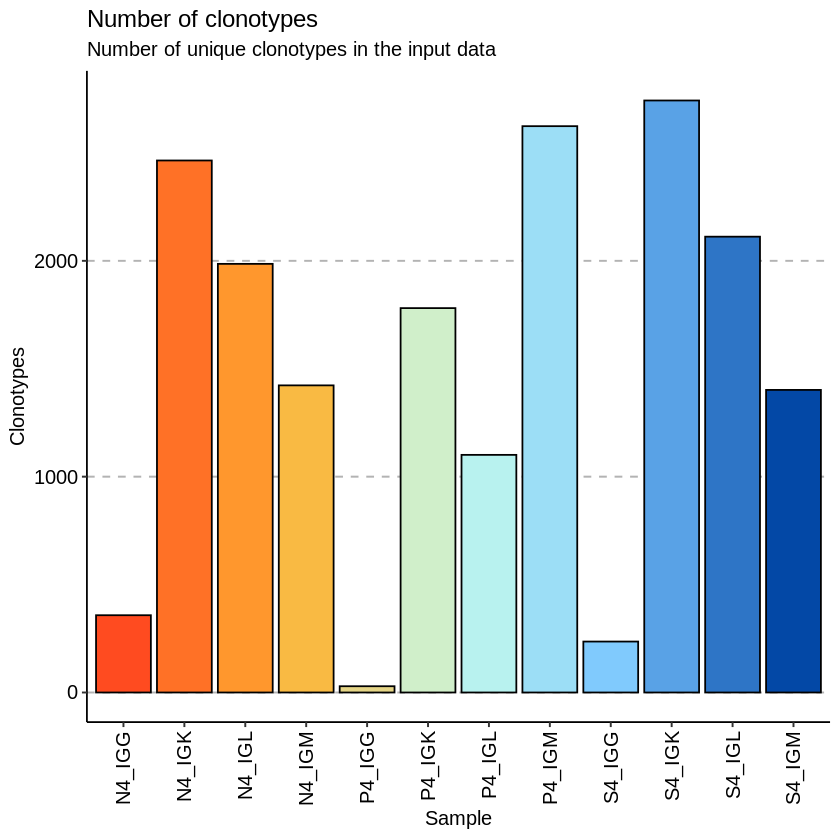

In [3]:
exp_vol <- repExplore(immdata$data, .method = "volume")
p1 <- vis(exp_vol)
p1 
ggsave(filename = "FIGURE_clonotype_p3.png", plot = p1, width = 4.8, height = 4.5, dpi = 600)

Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”


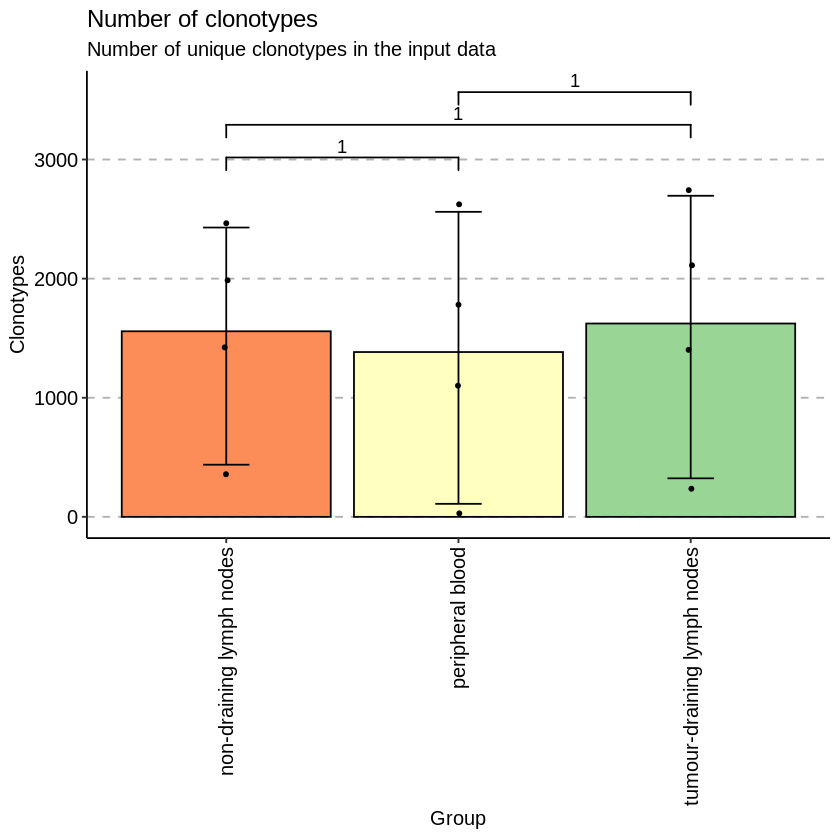

In [16]:
exp_vol <- repExplore(immdata$data, .method = "volume")
by_vec <- c("non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "peripheral blood", "peripheral blood", "peripheral blood", "peripheral blood", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes")
p <- vis(exp_vol, .by = by_vec)
p

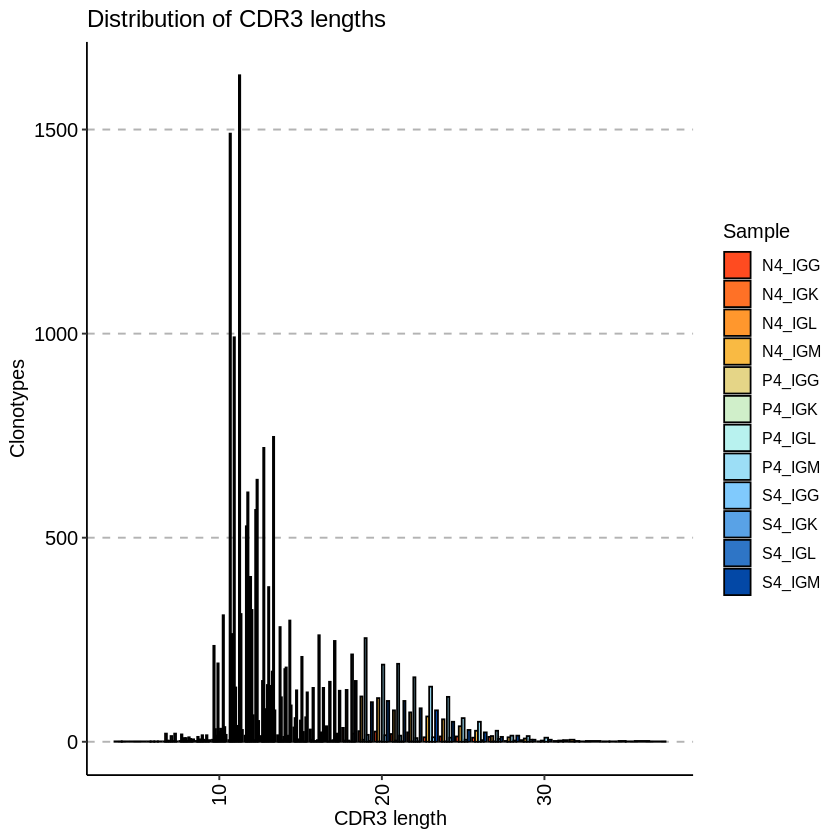

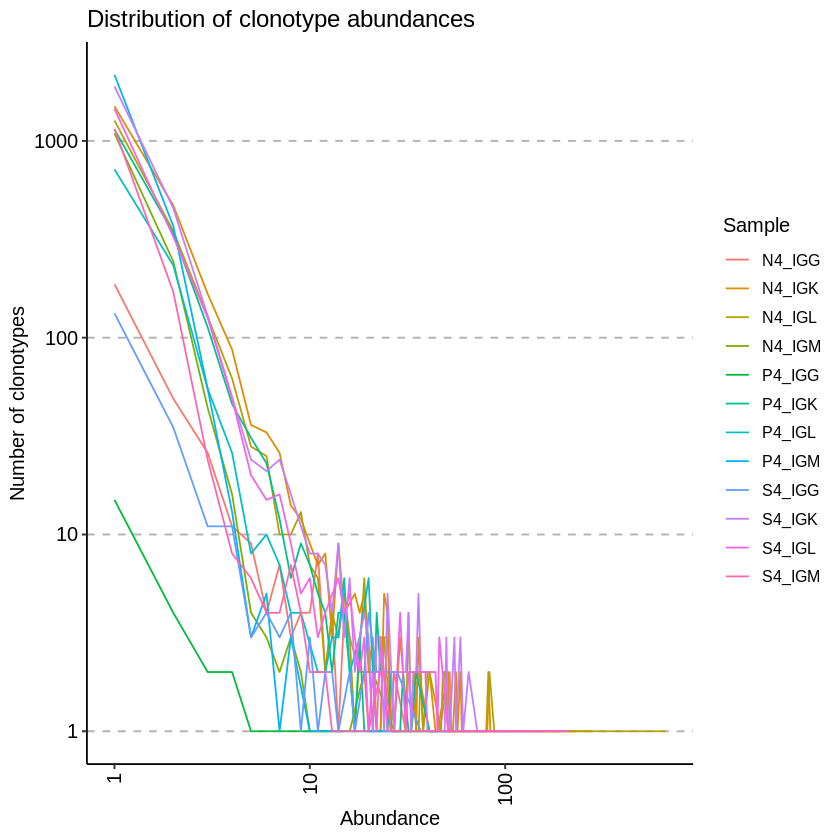

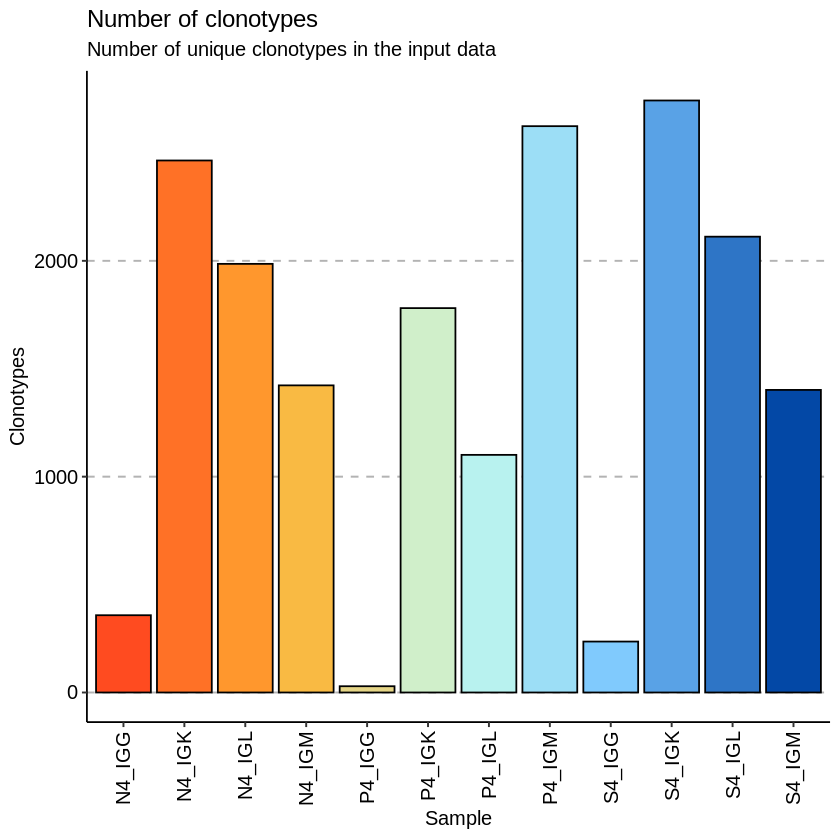

In [4]:
exp_len <- repExplore(immdata$data, .method = "len", .col = "aa")
exp_cnt <- repExplore(immdata$data, .method = "count")
exp_vol <- repExplore(immdata$data, .method = "volume")

p1 <- vis(exp_len)
p2 <- vis(exp_cnt)
p3 <- vis(exp_vol)

p1
p2
p3

In [4]:
#The clonal.prop method computes the proportion of repertoire occupied by the pools of cell clones:
imm_pr <- repClonality(immdata$data, .method = "clonal.prop")
imm_pr

,Clones,Percentage,Clonal.count.prop
N4_IGG,1,10.3,0.002793296
N4_IGK,4,10.2,0.001622718
N4_IGL,2,13.1,0.001007049
N4_IGM,5,11.4,0.003513703
P4_IGG,1,15.8,0.034482759
P4_IGK,11,10.2,0.006176305
P4_IGL,7,10.8,0.006357856
P4_IGM,59,10.1,0.022484756
S4_IGG,2,16.0,0.008474576
S4_IGK,9,10.7,0.003281079


In [5]:
# The top method considers the most abundant cell clonotypes:
imm_top <- repClonality(immdata$data, .method = "top", .head = c(10, 100, 1000, 3000, 10000))
imm_top

,10,100,1000,3000,10000
N4_IGG,0.33705357,0.8433036,1.0000000,1,1
N4_IGK,0.17137830,0.4974780,0.8281525,1,1
N4_IGL,0.26143363,0.5949417,0.8707902,1,1
N4_IGM,0.16113537,0.3209607,0.8152838,1,1
P4_IGG,0.75789474,1.0000000,1.0000000,1,1
P4_IGK,0.09510802,0.3672709,0.8060591,1,1
P4_IGL,0.13446421,0.4472487,0.9582127,1,1
P4_IGM,0.04511278,0.1338346,0.5115789,1,1
S4_IGG,0.40673788,0.8857847,1.0000000,1,1
S4_IGK,0.11488149,0.4470923,0.7742520,1,1


In [6]:
# While the rare method deals with the least prolific clonotypes:
imm_rare <- repClonality(immdata$data, .method = "rare")
imm_rare

,1,3,10,30,100,MAX
N4_IGG,0.08348214,0.1620536,0.2790179,0.5696429,0.8968750,1
N4_IGK,0.17595308,0.3449853,0.4878592,0.6307331,0.8591202,1
N4_IGL,0.16629537,0.3078234,0.4224872,0.5171013,0.7861355,1
N4_IGM,0.47641921,0.7471616,0.8205240,0.8855895,1.0000000,1
P4_IGG,0.15789474,0.3052632,0.6000000,1.0000000,1.0000000,1
P4_IGK,0.28408244,0.5366278,0.7253539,0.9197914,1.0000000,1
P4_IGL,0.29664874,0.5577162,0.6905254,0.9118742,1.0000000,1
P4_IGM,0.65203008,0.9236090,0.9651128,1.0000000,1.0000000,1
S4_IGG,0.10928513,0.1939195,0.3377157,0.6598192,0.9079704,1
S4_IGK,0.24491646,0.4128999,0.5321850,0.6828131,0.9660666,1


In [7]:
# Finally, the homeo method assesses the clonal space homeostasis, i.e., the proportion of the repertoire occupied by the clones of a given size:
imm_hom <- repClonality(immdata$data,
  .method = "homeo",
  .clone.types = c(Small = .0001, Medium = .001, Large = .01, Hyperexpanded = 1)
)
imm_hom

,Small (0 < X <= 1e-04),Medium (1e-04 < X <= 0.001),Large (0.001 < X <= 0.01),Hyperexpanded (0.01 < X <= 1)
N4_IGG,0,0.1272321,0.33080357,0.54196429
N4_IGK,0,0.4646334,0.38346041,0.15190616
N4_IGL,0,0.3874984,0.31870004,0.29380160
N4_IGM,0,0.6895197,0.18427948,0.12620087
P4_IGG,0,0.0000000,0.00000000,1.00000000
P4_IGK,0,0.5823193,0.37099578,0.04668488
P4_IGL,0,0.4894497,0.41208109,0.09846918
P4_IGM,0,0.9236090,0.07639098,0.00000000
S4_IGG,0,0.1092851,0.25718981,0.63352506
S4_IGK,0,0.4924233,0.42675819,0.08081855


Using Sample as id variables

Using Sample as id variables



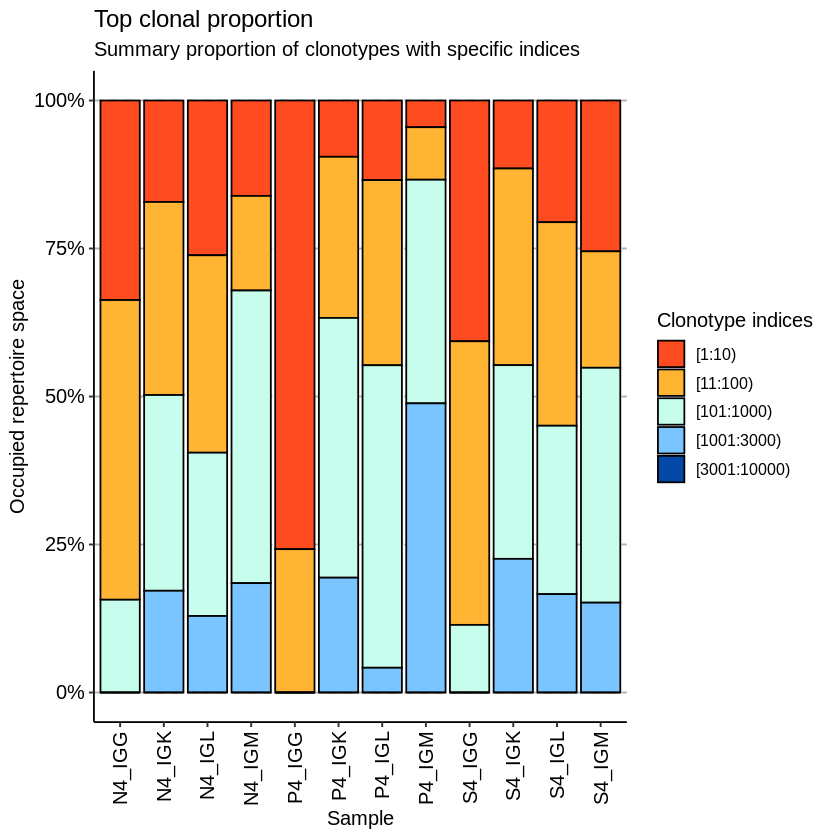

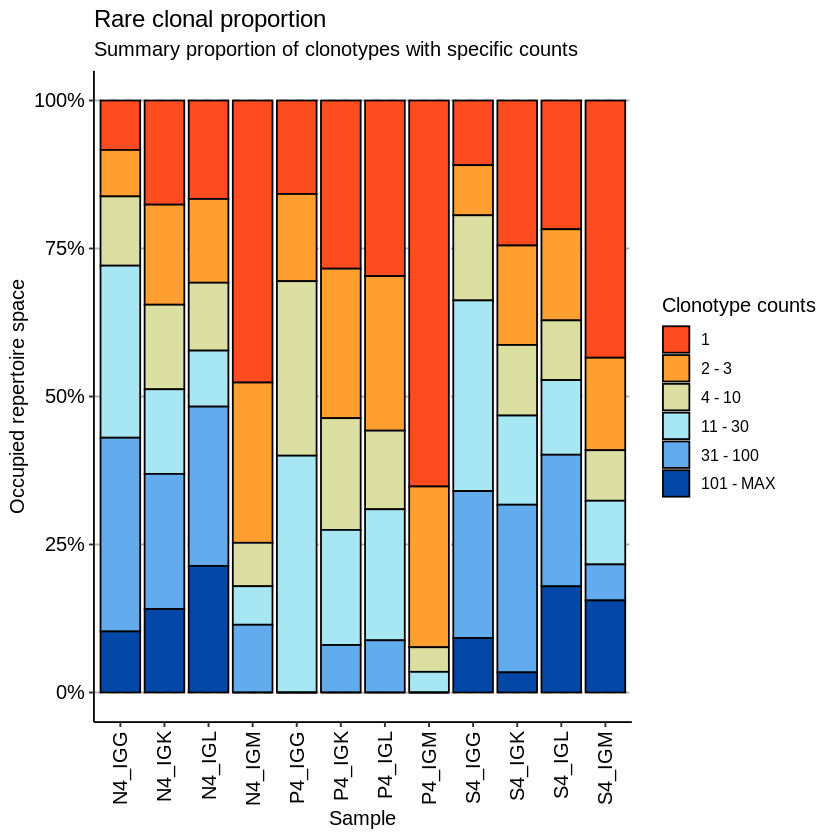

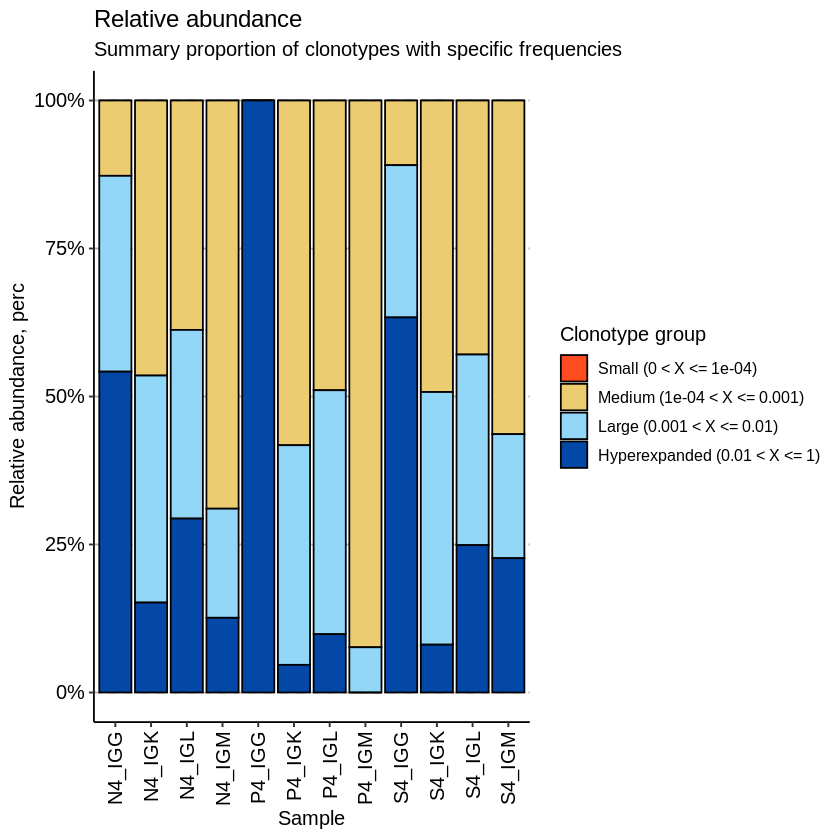

In [8]:
p1 <- vis(imm_top)
p2 <- vis(imm_rare)
p3 <- vis(imm_hom)
p1
p2
p3

ggsave(filename = "FIGURE_abundancy_p3.png", plot = p3, width = 6, height = 5, dpi = 600)

In [10]:
gene_stats()

alias,species,ighd,ighj,ighv,igij,igkj,igkv,iglj,iglv,traj,trav,trbd,trbj,trbv,trdd,trdj,trdv,trgj,trgv
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bt,BosTaurus,21,4,25,0,1,6,5,26,46,0,0,0,0,5,3,0,6,15
cd,CamelusDromedarius,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2
clf,CanisLupusFamiliaris,0,0,0,0,0,0,0,0,0,0,2,8,19,0,0,0,7,8
dr,DanioRerio,7,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hs,HomoSapiens,30,13,248,0,5,64,7,69,57,60,3,14,64,3,4,6,4,10
macmul,MacacaMulatta,24,7,19,0,4,83,5,0,0,0,2,15,58,0,0,0,0,0
mmc,MusMusculusCastaneus,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
mmd,MusMusculusDomesticus,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
musmus,MusMusculus,32,8,225,0,8,109,3,5,42,145,2,14,23,2,3,7,0,11


In [11]:
imm_gu <- geneUsage(immdata$data, "hs.trbv")
imm_gu

Names,N4_IGG,N4_IGK,N4_IGL,N4_IGM,P4_IGG,P4_IGK,P4_IGL,P4_IGM,S4_IGG,S4_IGK,S4_IGL,S4_IGM
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
IGHV1-18,18,NA,NA,34,1,NA,NA,134,8,NA,NA,26
"IGHV1-18, IGHV1-2, IGHV1-3",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2
"IGHV1-18, IGHV1-2, IGHV1-46",NA,NA,NA,1,NA,NA,NA,1,NA,NA,NA,NA
"IGHV1-18, IGHV1-2, IGHV1-8",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
"IGHV1-18, IGHV1-8, IGHV1-46",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
IGHV1-2,2,NA,NA,24,NA,NA,NA,40,NA,NA,NA,23
IGHV1-24,10,NA,NA,14,NA,NA,NA,36,7,NA,NA,13
IGHV1-3,4,NA,NA,19,NA,NA,NA,80,5,NA,NA,16
"IGHV1-3, IGHV1-46, IGHV1-69",1,NA,NA,1,NA,NA,NA,1,NA,NA,NA,NA


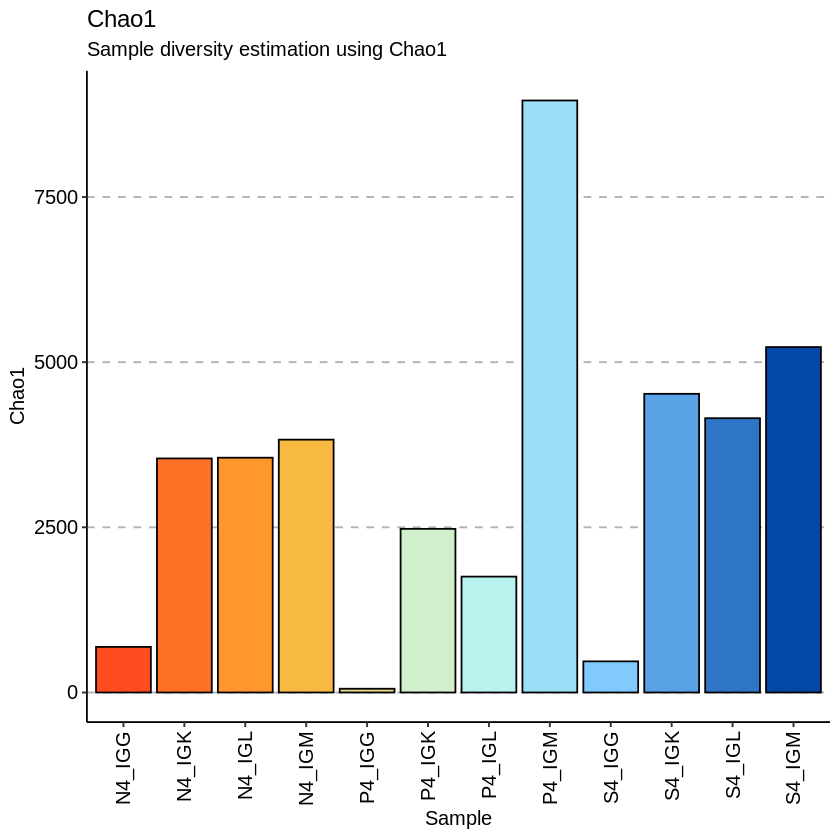

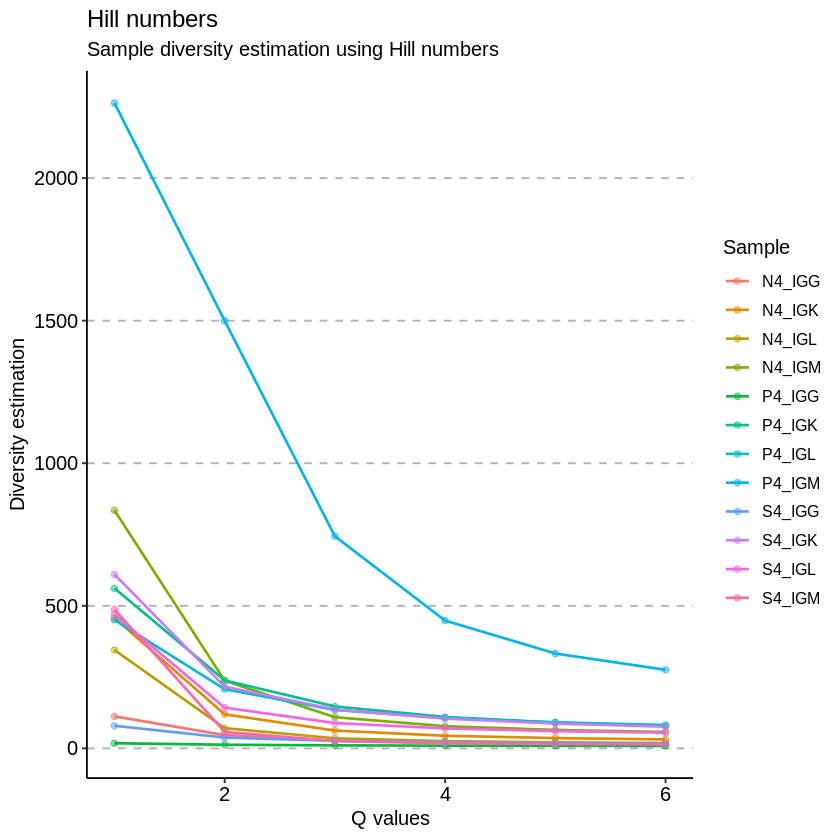

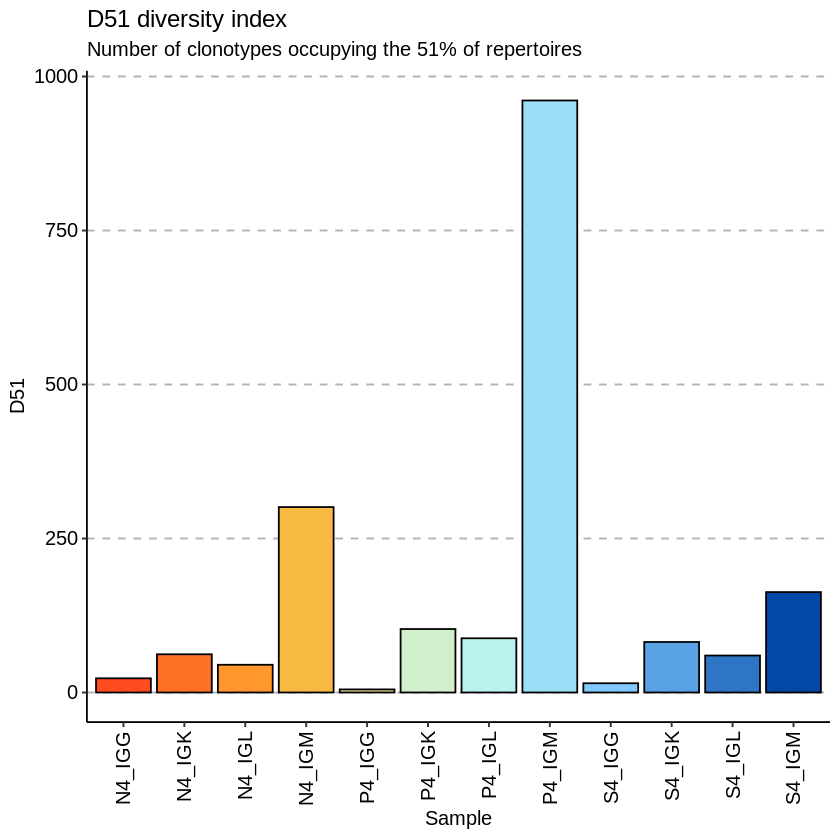

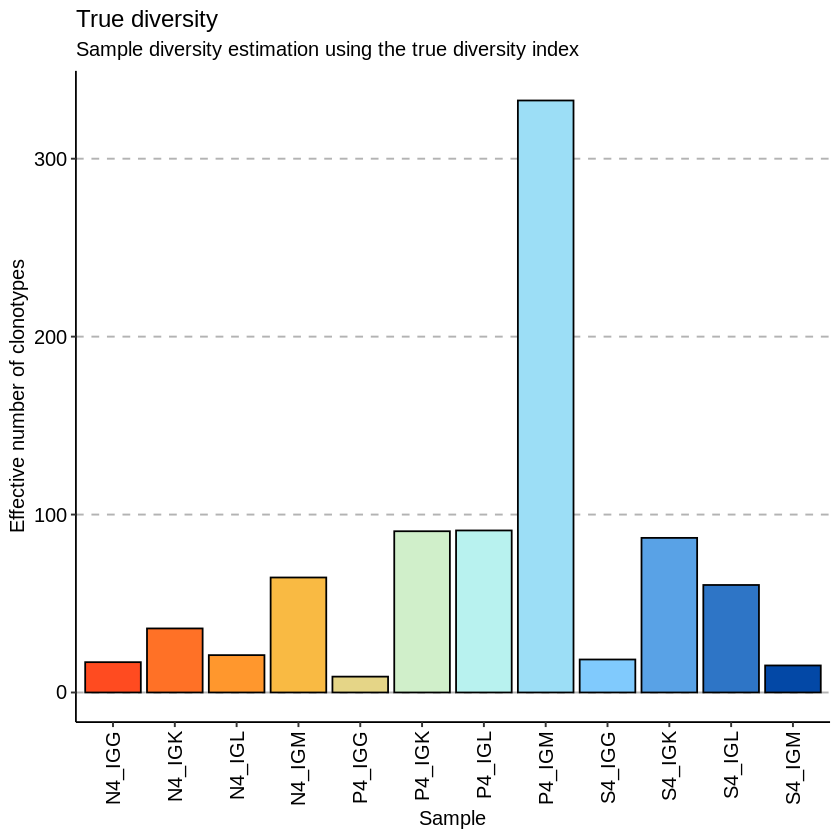

In [3]:
# Compute statistics and visualise them
# Chao1 diversity measure
div_chao <- repDiversity(immdata$data, "chao1")

# Hill numbers
div_hill <- repDiversity(immdata$data, "hill")

# D50
div_d50 <- repDiversity(immdata$data, "d50")

# Ecological diversity measure
div_div <- repDiversity(immdata$data, "div")

p1 <- vis(div_chao)
p2 <- vis(div_hill)
p3 <- vis(div_d50)
p4 <- vis(div_div)

p1
p2
p3
p4

ggsave(filename = "FIGURE_div50_p3.png", plot = p3, width = 4.8, height = 4.5, dpi = 600)

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


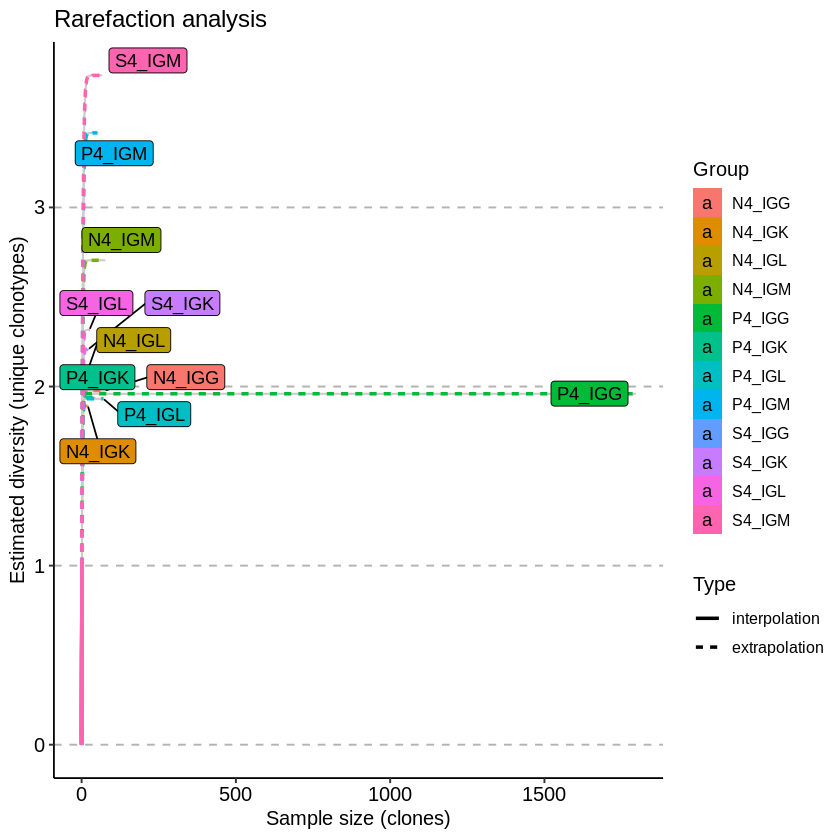

In [13]:
imm_raref <- repDiversity(immdata$data, "raref", .verbose = F)

p1 <- vis(imm_raref)
p1

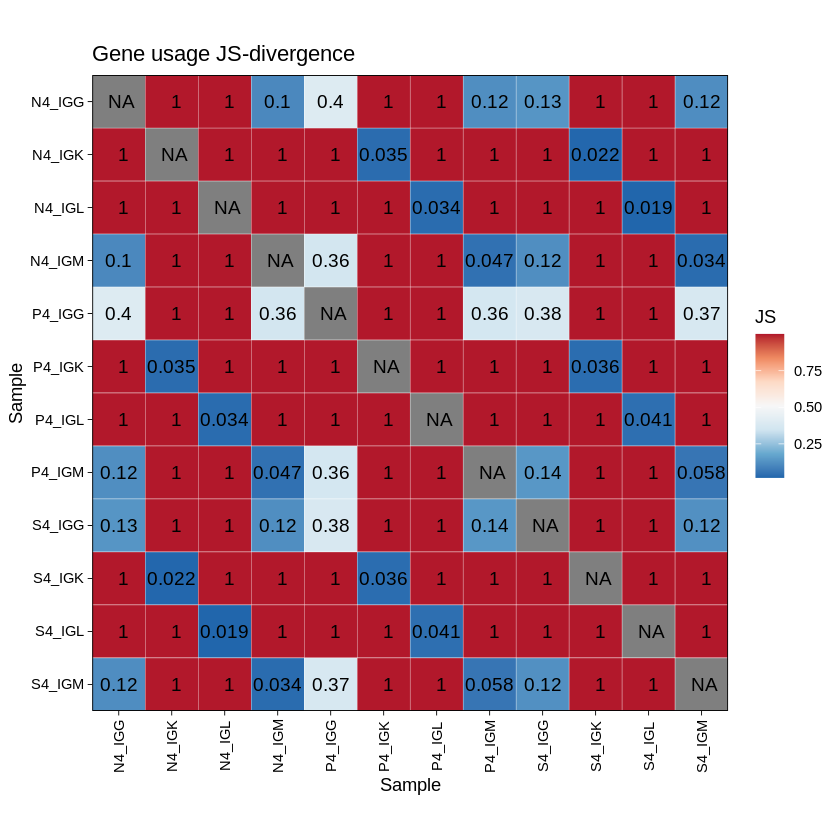

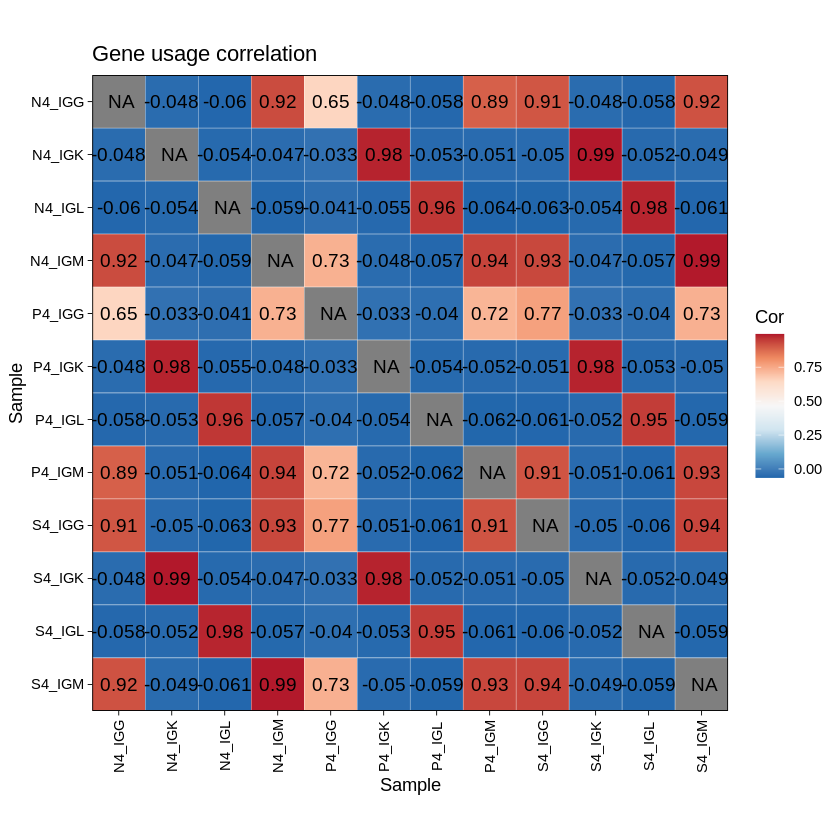

In [14]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)

imm_gu_js <- geneUsageAnalysis(imm_gu, .method = "js", .verbose = F)
imm_gu_cor <- geneUsageAnalysis(imm_gu, .method = "cor", .verbose = F)

p1 <- vis(imm_gu_js, .title = "Gene usage JS-divergence", .leg.title = "JS", .text.size = 4)
p2 <- vis(imm_gu_cor, .title = "Gene usage correlation", .leg.title = "Cor", .text.size = 4)

p1
p2

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


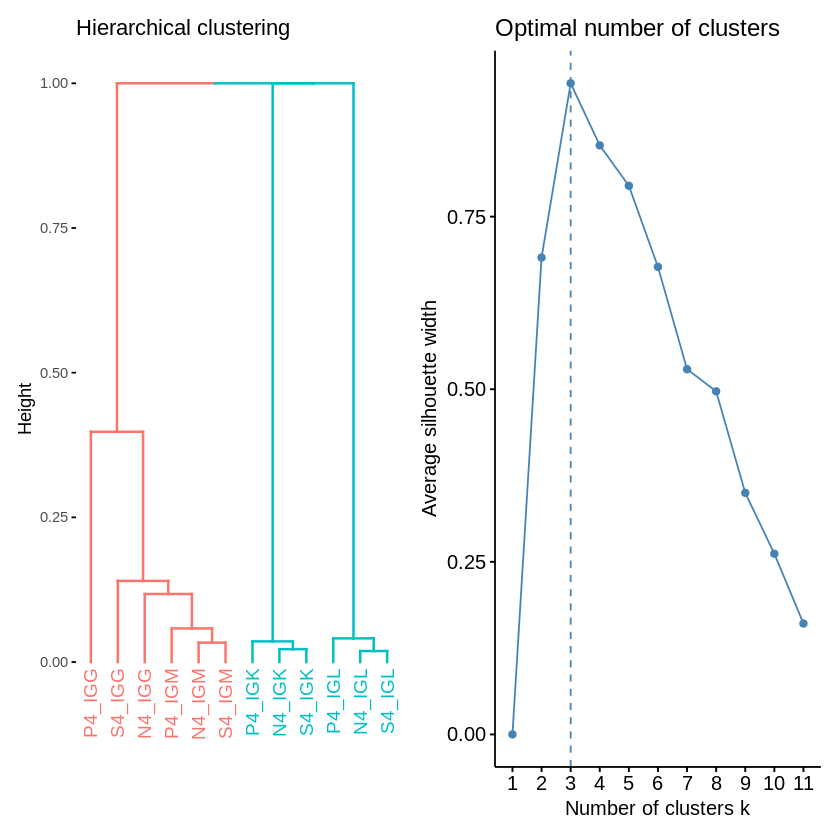

In [15]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)
vis(imm_gu_js <- geneUsageAnalysis(imm_gu, .method = "js+hclust", .verbose = F))

Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”


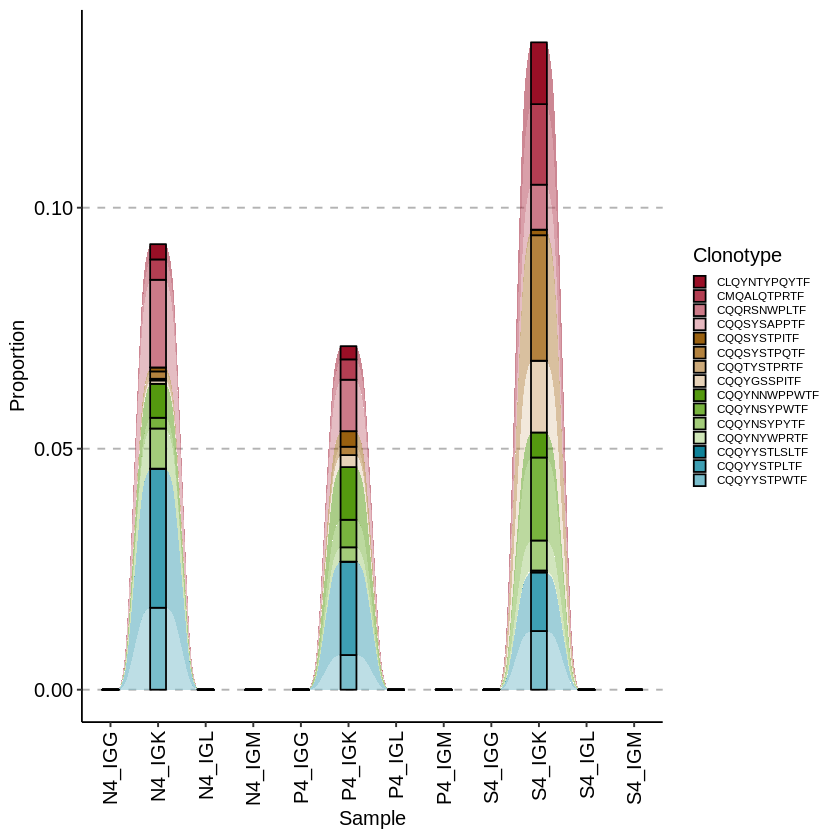

In [4]:
library(pals)
target <- c("CQQYYSTPWTF", "CQQYNSYPYTF", "CQQSYSAPPTF", "CQQTYSTPRTF", "CQQYNNWPPWTF", "CQQYYSTPLTF", "CQQYYSTLSLTF", "CQQSYSTPITF", "CQQYNYWPRTF", "CQQRSNWPLTF", "CQQSYSTPQTF", "CQQYNSYPWTF", "CMQALQTPRTF", "CQQYGSSPITF", "CLQYNTYPQYTF"

)
tc <- trackClonotypes(immdata$data, target, .col = "aa")
p <- vis(tc) + scale_fill_manual(values=as.vector(stepped(15))) + theme(plot.title = element_blank(), legend.key.size = unit(0.3, 'cm'), legend.key.height = unit(0.3, 'cm'), legend.key.width = unit(0.3, 'cm'), legend.text = element_text(size=7))
p 
ggsave(filename = "FIGURE_p3_IGK_track.png", plot = p, width = 5, height = 4.5, dpi = 600)